In [1]:
import torch

# A, B, C를 노드 특징 벡터로 정의
A = [1, 2, 3, 4]
B = [5, 6, 7, 8]
C = [9, 10, 11, 12]

# torch.tensor로 변환 후, 각 노드 ID(0, 1, 2)에 해당하는 특징으로 쌓음
# 노드 ID: 0(A), 1(B), 2(C)
x = torch.tensor([A, B, C], dtype=torch.float)

# x의 크기: (노드 수) x (특징 차원) = (3, 4)
# print(x.shape) # torch.Size([3, 4])

In [2]:
# 엣지 정의 (모든 엣지 쌍을 나열)
source_nodes = [0, 1, 0, 1]  # A->B, B->A, A->C, B->C
target_nodes = [1, 0, 2, 2]  # A->B, B->A, A->C, B->C

# PyG 형식인 (2, 엣지 수) 모양의 Long Tensor로 변환
edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)

# edge_index의 크기: (2, 엣지 수) = (2, 4)
# print(edge_index.shape) # torch.Size([2, 4])

In [3]:
from torch_geometric.data import Data

# Data 객체 생성
data = Data(x=x, edge_index=edge_index)

print("--- PyTorch Geometric Data 객체 생성 완료 ---")
print(data)
print(f"노드 수: {data.num_nodes}")    # 3
print(f"엣지 수: {data.num_edges}")    # 4 (단방향 엣지 4개)
print(f"특징 차원: {data.num_node_features}") # 4
print(f"양방향 엣지 여부: {data.is_undirected()}") # False (단방향 엣지가 포함되어 있으므로)

c:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\libpyg.pyd
  import torch_geometric.typing
c:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\torch_scatter\_version_cuda.pyd
  import torch_geometric.typing
c:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\pegoo\anaconda3\envs\graph_env\Lib\site-packages\torch_cluster\_version_cuda.pyd
  import torch_geometric.typing
c:\Users\pegoo\a

--- PyTorch Geometric Data 객체 생성 완료 ---
Data(x=[3, 4], edge_index=[2, 4])
노드 수: 3
엣지 수: 4
특징 차원: 4
양방향 엣지 여부: False


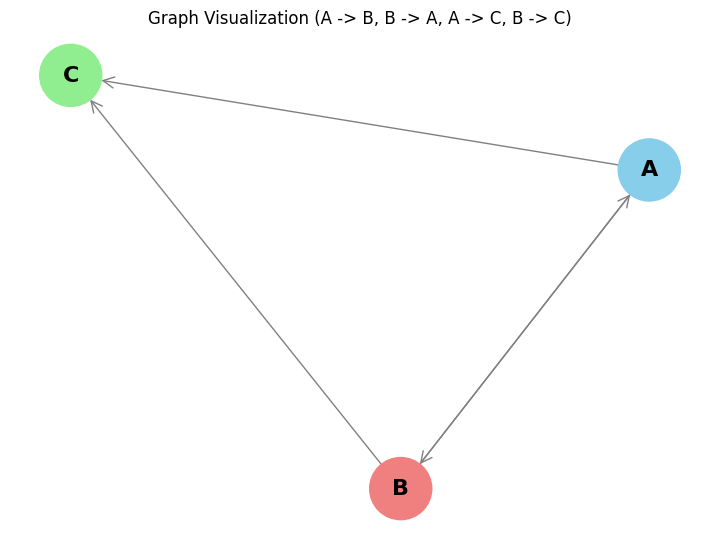

In [4]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

# 1. 이전 단계에서 정의한 데이터 재구성
A = [1, 2, 3, 4]
B = [5, 6, 7, 8]
C = [9, 10, 11, 12]
x = torch.tensor([A, B, C], dtype=torch.float)
source_nodes = [0, 1, 0, 1]
target_nodes = [1, 0, 2, 2]
edge_index = torch.tensor([source_nodes, target_nodes], dtype=torch.long)
data = Data(x=x, edge_index=edge_index)

# 2. PyG Data 객체를 NetworkX Directed Graph (DiGraph)로 변환
# to_undirected=False로 설정하여 단방향 그래프(Directed Graph)로 변환
G = to_networkx(data, to_undirected=False)

# 3. 노드 ID(0, 1, 2)에 레이블(A, B, C) 지정
node_labels = {0: 'A', 1: 'B', 2: 'C'}

# 4. 그래프 시각화
plt.figure(figsize=(7, 5))
pos = nx.spring_layout(G) # 노드 위치 결정 알고리즘 (레이아웃)

nx.draw(G, pos,
        with_labels=True,
        labels=node_labels, # A, B, C 레이블 사용
        node_size=2000,
        node_color=['skyblue', 'lightcoral', 'lightgreen'], 
        font_size=16,
        font_weight='bold',
        edge_color='gray',
        arrows=True, # 화살표 표시 (방향성)
        arrowstyle='->',
        arrowsize=20
       )

plt.title("Graph Visualization (A -> B, B -> A, A -> C, B -> C)")
plt.show()

In [6]:
import torch
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

# Cora 데이터셋 로드 (특징을 정규화하여 학습 안정성을 높임)
# root: 데이터셋을 저장할 폴더 경로
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=NormalizeFeatures())

# 데이터셋 객체에서 하나의 그래프 데이터 인스턴스를 가져옴
data = dataset[0]

print("--- Cora 데이터셋 정보 ---")
print(f"데이터셋: {dataset}")
print(f"클래스 개수 (y 레이블): {dataset.num_classes}") # 7 (7개 학술 분야)
print(f"특징 차원 (x 크기): {dataset.num_node_features}") # 1433

Processing...


--- Cora 데이터셋 정보 ---
데이터셋: Cora()
클래스 개수 (y 레이블): 7
특징 차원 (x 크기): 1433


Done!


In [7]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [11]:
edge_weight = torch.rand(1, 10556)

In [13]:
data['edge_weight'] = edge_weight

In [14]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_weight=[1, 10556])

In [15]:
data.edge_weight

tensor([[0.3993, 0.1632, 0.5053,  ..., 0.2246, 0.8719, 0.7582]])

In [16]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])